In [1]:
from reader import Data, encode, decode
from matplotlib import pyplot as plt
import numpy as np
import cv2
%matplotlib inline

In [2]:
train_list = ["voc_2007_train.txt", "voc_2012_train.txt", "voc_2007_val.txt", "voc_2012_val.txt"]
df = Data(train_list, shuffle=False, flip=False, random_crop=False, random_expand=False, random_inter=False, save_img=False)

In [3]:
df.reset_state()

In [4]:
g = df.get_data()

In [5]:
dp = next(g)

> /home/user/yzx/SSD/reader.py(310)generate_sample()
-> boxes[:,0::2] = boxes[:,0::2] / w
(Pdb) c


In [6]:
image = dp[0]

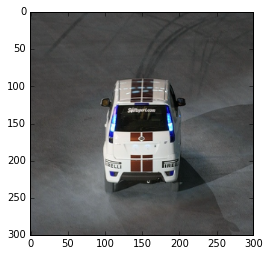

In [7]:
plt.imshow(image)

In [8]:
gt_boxes = dp[1]

In [9]:
image_with_boxes_1 = np.copy(image)
image_with_boxes_2 = np.copy(image)
height, width, _ = image.shape

In [10]:
gt_boxes

array([[0.29129129, 0.312     , 0.81081081, 0.702     ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        ,

In [11]:
for gt_box in gt_boxes:
    cv2.rectangle(image_with_boxes_1,
                  (int(width * gt_box[1]), int(height * gt_box[0])),
                  (int(width * gt_box[3]), int(height * gt_box[2])),
                  (255, 0, 0),
                  3)
    if np.sum(gt_box) == 0:
        break

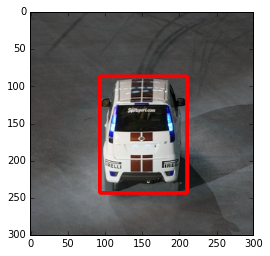

In [12]:
plt.imshow(image_with_boxes_1)

In [13]:
anchor_cls = dp[2]
anchor_neg_mask = dp[3]
anchor_loc = dp[4]

In [14]:
anchor_cls

array([0, 0, 0, ..., 0, 0, 0])

In [15]:
boxes = decode(anchor_loc)

In [16]:
boxes.shape

(11620, 4)

In [17]:
anchor_pos_mask = np.invert(anchor_neg_mask)

In [18]:
decode_boxes = boxes[anchor_pos_mask]

In [19]:
for gt_box in decode_boxes:
    cv2.rectangle(image_with_boxes_2,
                  (int(width * gt_box[0]), int(height * gt_box[1])),
                  (int(width * gt_box[2]), int(height * gt_box[3])),
                  (255, 0, 0),
                  3)

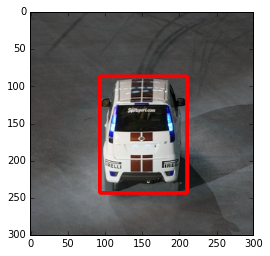

In [20]:
plt.imshow(image_with_boxes_2)